KMeans Question 2 and 3 

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import sys
import matplotlib
import pandas as pd
import random
import numpy as np
import io
import matplotlib.pyplot as plt
from math import exp 
from sklearn.metrics import pairwise_distances_argmin
np.random.seed(2)

In [20]:
#Read the training dataset
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset_2/mnist.csv',header=None)
#train.head()

In [21]:
#For X_train
X_train = train.iloc[:,1:].to_numpy()

#4000test set
X_train_optimal=train.iloc[:4000,1:].to_numpy()

#2000 tests et
Y_train_optimal=train.iloc[:2000,1:].to_numpy()
print(Y_train_optimal.shape)
X_train_optimal.shape

#To test RBF
X_train_rbf=train.iloc[:500,1:].to_numpy()
print(X_train_rbf.shape)
y_train = train.iloc[:,0].to_numpy()

(2000, 784)
(500, 784)


Question 2 and Question 3

In [22]:
#Implement the Kmeans Function that returns Labels,Centers,and Loss
class KMeans1(object):

    def __init__(self): 
        pass
 
    def pairwise_dist_eucl(self,x,y): 
      #calculate the distance ( Euclidean dsitance)   
      #With Matrixcalculation
        x_2 = np.sum(np.square(x),axis=1);
        y_2 = np.sum(np.square(y),axis=1);
        mul = np.dot(x, y.T);
        dists = np.sqrt(abs(x_2[:, np.newaxis] + y_2-2*mul))
        return dists
   
   
  
    def centers_assignment(self, X, k):  
        r, c = X.shape
        array_ret = np.empty([k, c])
        for n in range(k):
            random_index = np.random.randint(r)
            array_ret[n] = X[random_index]
        
        return array_ret
   

   
    def centers_new(self, centers_old, labels1, X):  
        k, d = centers_old.shape
        centers_new_arr = np.empty(centers_old.shape)
        for i in range(k):
            centers_new_arr[i] = np.array(X[labels1 == i].mean(0))
        return centers_new_arr
    


    def calculate_loss(self, centroids, labels1, X):  
        dists = self.pairwise_dist_eucl(X, centroids)
        loss = 0.0
        n, d = X.shape
        for i in range(n):
            d1=dists[i]
            l1=labels1[i]
            #count  the loss (sum the distance and centers)
            loss = loss + np.square(d1[l1])
  
        return loss
  

  
  
    #Call the function
    def __call__(self, X, k, iteration_max=100, verbose=False):
  
    
        centroids = self.centers_assignment(X, k)
        #To store iteration and array
        it1=[]
        loss1=[]
        for it in range(iteration_max):
            
            labels1 = pairwise_distances_argmin(X, centroids)
            centroids = self.centers_new(centroids, labels1, X)
            loss = self.calculate_loss(centroids, labels1, X)
            k= centroids.shape[0]
            #append to the iteration and loss
            it1.append(it)
            loss1.append(loss)
            
    
           
            

    
            if verbose: 
              #Print the iteration and losses 
              #For debugging purpose
             print('test' , it , 'loss',loss)
            

    
         #Plot the number of iteration and losses
        plt.plot(it1,loss1)
        plt.xlabel('Number of Iteration')
        plt.ylabel('Loss')    
        return  labels1, centroids , loss
      
      

Labels of X_train with 10 clusters [7 6 9 ... 4 8 0]
Centers of 10 clusters [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
234281.9769747943


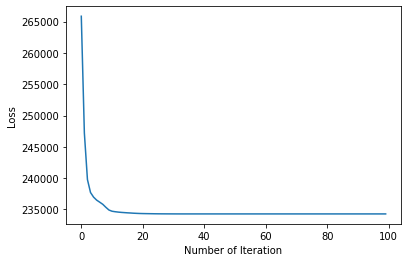

In [23]:
labels_try,centroids_try,loss_try=KMeans1()(X_train,10)
print('Labels of X_train with 10 clusters',labels_try)
print('Centers of 10 clusters' , centroids_try)
print(loss_try)